# DATA MINING by MARWAH KAMILA AHMAD


> Aturan : jangan jalankan seluruh code di bawah ini secara otomatis. karena akan ada 2 model yang digunakan dalam training data yang akan dibandingkan RMSE nya. pilih salah satu **Linear Regression** atau **Support Vector Regression**


> Petunjuk : kalimat dalam baris comment adalah penjelasan kode tersebut










In [1]:
# berikut adalah library yang digunakan

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# berikut adalah untuk membaca file dataset

data = pd.read_csv("train.csv")

In [2]:
# berikut untuk melihat 5 baris data teratas

data.head()

,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
0,Betina,1.3125,1.0625,0.3625,22.665425,9.482908,5.925046,6.803880,15
1,Indeterminate,1.3250,0.9875,0.2875,13.466012,5.740774,2.863300,NaN,8
2,Jantan,1.1250,0.8000,0.2500,10.801160,4.833590,2.126212,3.260193,9
3,Indeterminate,1.3500,0.9750,0.3125,17.732612,7.158249,4.479221,5.386405,8
4,Betina,NaN,1.2875,0.4250,36.542505,17.009700,8.348928,9.397859,9


In [3]:
# berikut adalah untuk mendeskripsikan hitungan matematis dari data
# tujuannya adalah untuk melihat apakah mean sama dengan median. jika sama, maka distribusinya adalah normal distribution

data.describe()

,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
count,2678.000000,3342.000000,3259.000000,3342.000000,3342.000000,3342.000000,3108.000000,3342.000000
mean,1.312836,1.021993,0.350311,23.608657,10.197083,5.140463,6.847572,9.972472
std,0.300313,0.248532,0.106687,13.905232,6.247424,3.104521,3.985372,3.227272
min,0.275000,0.225000,0.000000,0.226796,0.070874,0.056699,0.085048,2.000000
25%,1.125000,0.875000,0.287500,12.686401,5.347424,2.668397,3.766940,8.000000
50%,1.362500,1.062500,0.362500,22.792998,9.567956,4.861939,6.697569,10.000000
75%,1.537500,1.212500,0.412500,32.867702,14.273973,7.229122,9.397859,11.000000
max,1.950000,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [4]:
# berikut adalah hitungan median pada data. karena hasilnya mean tidak jauh dengan median atau beda 0.5
# maka distribusinya adalah cenderung normal dengan skewness 0.5. dari sini, kami akan menggunakan median

data.median()

<ipython-input-4-169ad8f18fcc>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


Panjang                        1.362500
Diameter Cangkang              1.062500
Tinggi                         0.362500
Berat Daging Belum Dikupas    22.792998
Berat Daging Udah Dikupas      9.567956
Berat Organ Dalam              4.861939
Berat Cangkang                 6.697569
Umur Kerang                   10.000000
dtype: float64

In [5]:
# berikut adalah untuk menghhitung banyaknya kolom yang kosong

data.isnull().sum()

Jenis Kelamin                   0
Panjang                       664
Diameter Cangkang               0
Tinggi                         83
Berat Daging Belum Dikupas      0
Berat Daging Udah Dikupas       0
Berat Organ Dalam               0
Berat Cangkang                234
Umur Kerang                     0
dtype: int64

In [6]:
# berikut untuk memapping atau meng encode data secara alphabet menjadi data numerik

data['Jenis Kelamin'] = data['Jenis Kelamin'].map({'Betina':0,'Indeterminate':1, 'Jantan':2})

<Axes: >

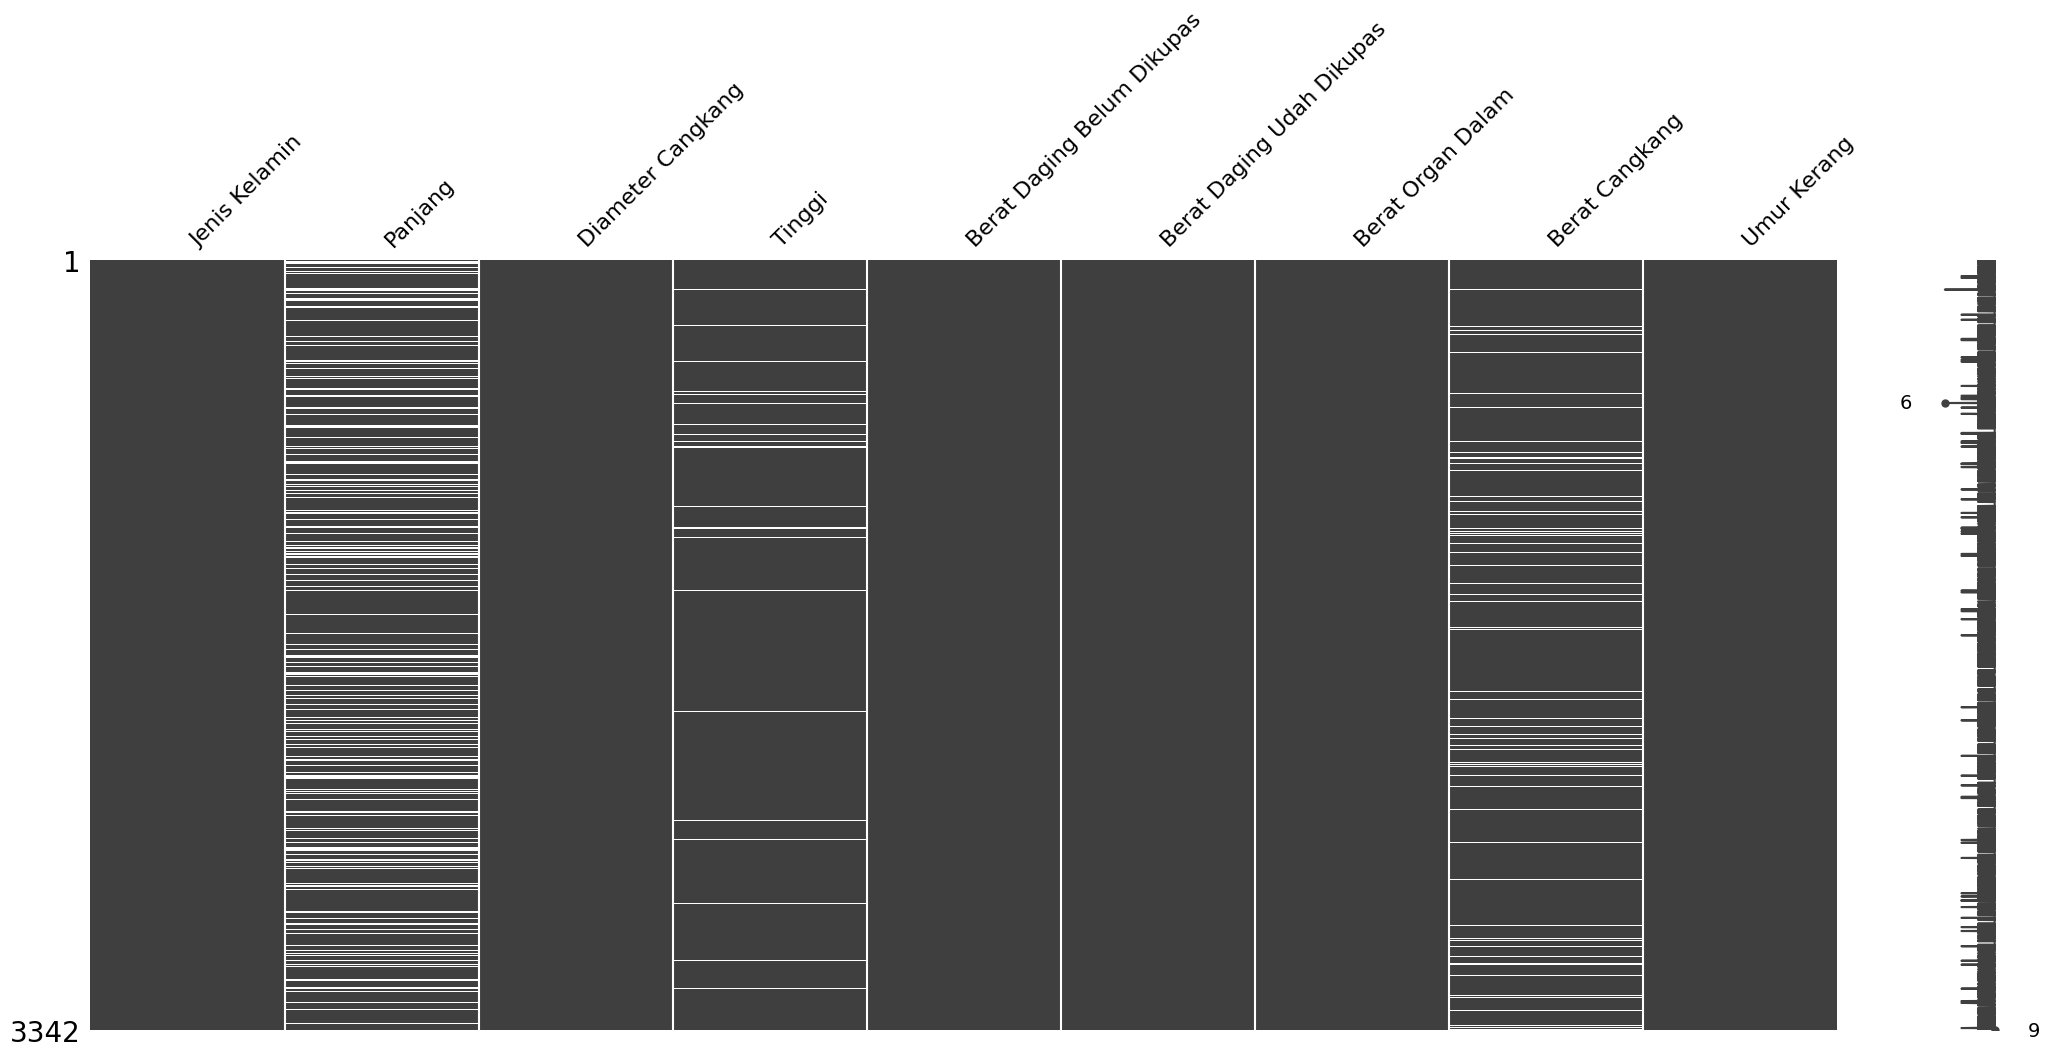

In [7]:
# berikut untuk memvisualisasikan data null

import missingno as msno
msno.matrix(data)

In [8]:
# karena banyak datta null, sehingga sangat sayang jika dibuang, maka berikut adalah untuk mengganti data null dengan median data

data['Panjang'].fillna(data['Panjang'].median(), inplace = True)
data['Tinggi'].fillna(data['Tinggi'].median(), inplace = True)
data['Berat Cangkang'].fillna(data['Berat Cangkang'].median(), inplace = True)

In [9]:
# kemudian cek lagi berapa banyak data yang null. jika 0 maka semua data telah diisi
data.isnull().sum()

Jenis Kelamin                 0
Panjang                       0
Diameter Cangkang             0
Tinggi                        0
Berat Daging Belum Dikupas    0
Berat Daging Udah Dikupas     0
Berat Organ Dalam             0
Berat Cangkang                0
Umur Kerang                   0
dtype: int64

<Axes: >

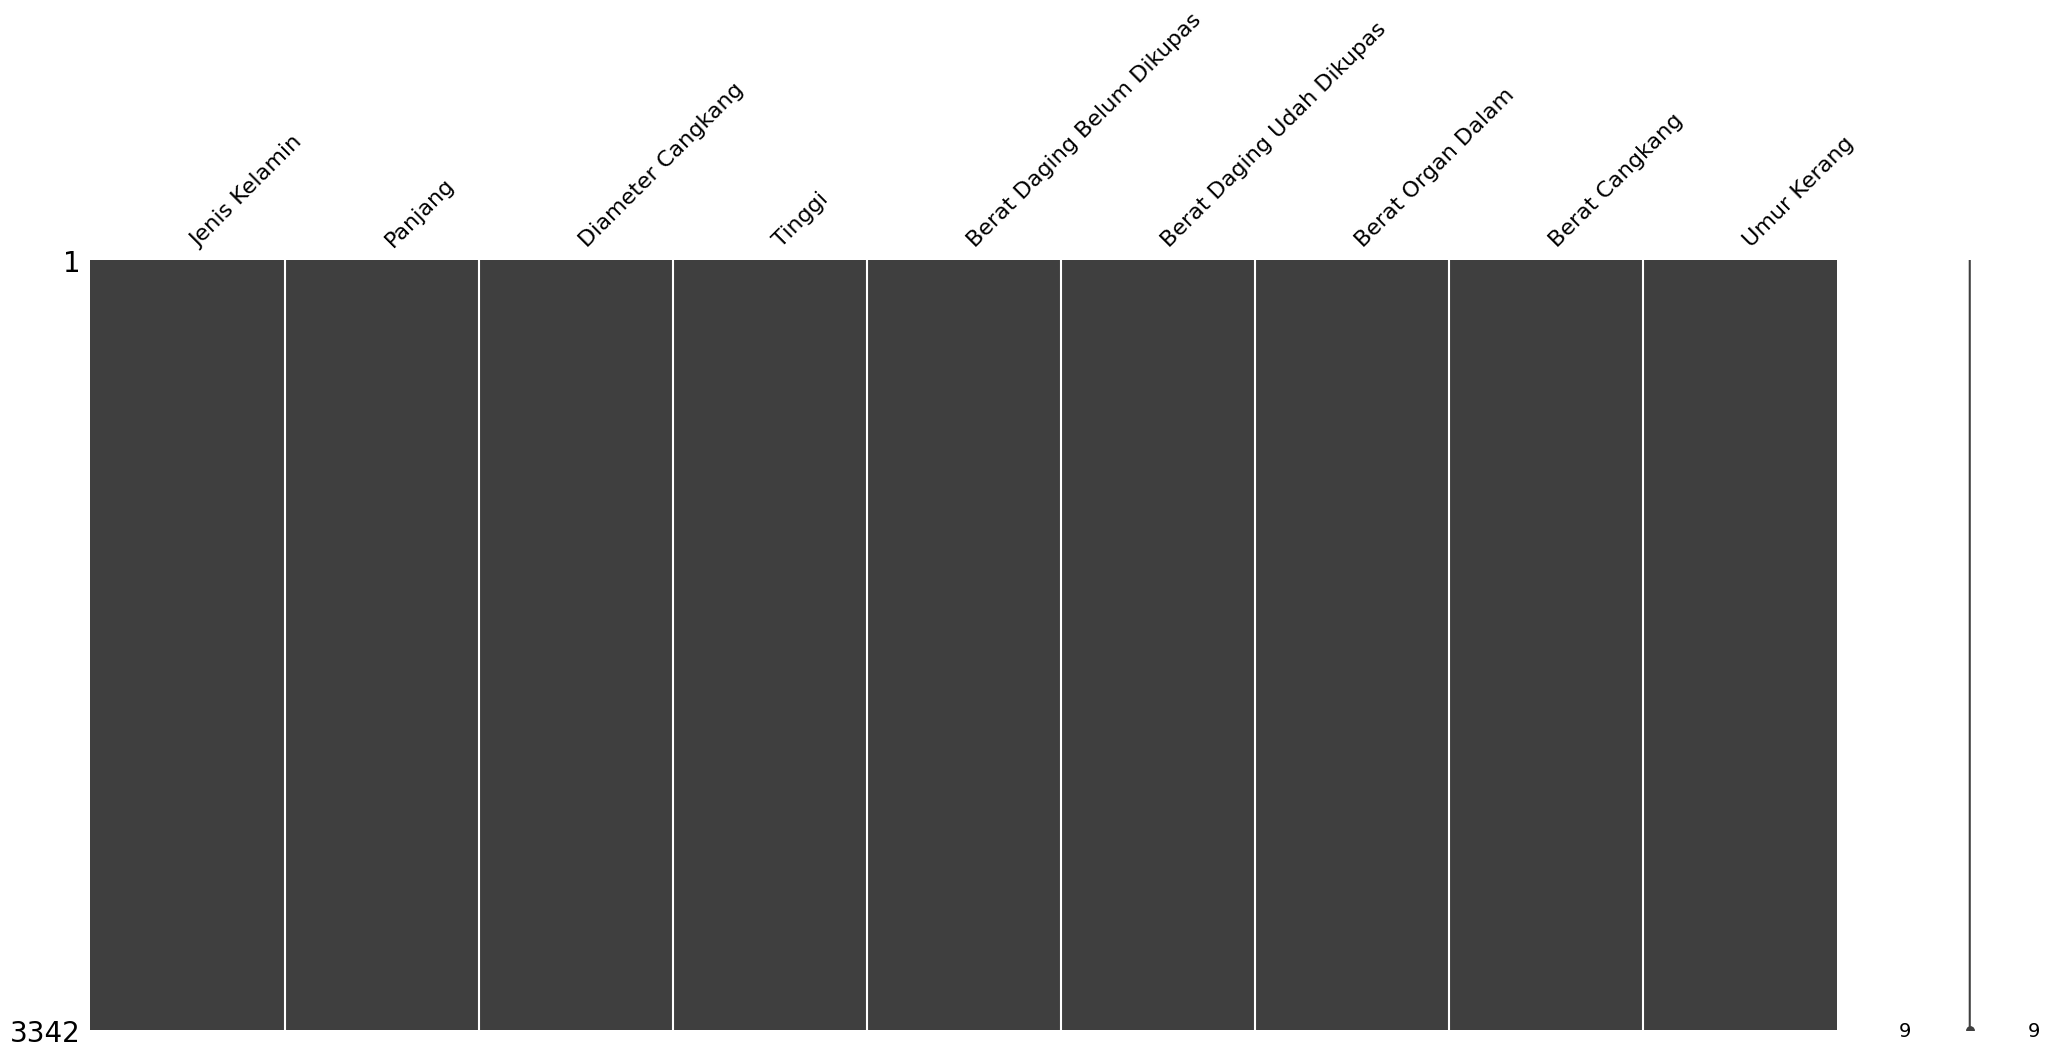

In [10]:
# berikut adalah untuk memvisualisasikan banyaknya data yang null. hasilnya bersih

msno.matrix(data)

In [11]:
# berikut adalah untuk memisahkan data yang akan ditraining dengan target testingnya
# pada feature sebagai x nya, menghilangkan kolom yang tidak perlu digunakan seperti jenis kelamin dan umur kerangnya
# pada target sebagai y nya. hanya menggunakan kolom umur kerang

target = data['Umur Kerang']
feature = data.drop(['Umur Kerang', 'Jenis Kelamin'], axis=1)
feature.head()

,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang
0,1.3125,1.0625,0.3625,22.665425,9.482908,5.925046,6.803880
1,1.3250,0.9875,0.2875,13.466012,5.740774,2.863300,6.697569
2,1.1250,0.8000,0.2500,10.801160,4.833590,2.126212,3.260193
3,1.3500,0.9750,0.3125,17.732612,7.158249,4.479221,5.386405
4,1.3625,1.2875,0.4250,36.542505,17.009700,8.348928,9.397859


In [12]:
# berikut ini memisahkan training dan testing data dengan test size = 20% yang berarti rasio training : testing = 80% dan 20%

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(feature,target,test_size = 0.20)

In [13]:
# berikut untuk melihat berapa banyak data yang masuk dalam training dan testing

print(len(X_train),len(y_train),len(X_test),len(y_test))

2673 2673 669 669


## Linear Regression

In [14]:
# berikut ini adalah bagaimana pemodelan linear regression nya

model = LinearRegression()
model.fit(X_train, y_train)
print(model)

LinearRegression()


In [15]:
# berikut untuk memprediksi X_test yang sudah di split di atas

y_pred = model.predict(X_test)

In [16]:
# berikut untuk melihat hasil score MSE dan RMSE nya
# Semakin kecil nilai MSE, semakin baik kualitas model tersebut.
# Semakin kecil nilai RMSE, semakin baik kualitas model tersebut.

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

MSE: 6.4271302937179255
RMSE: 2.535178552630549


In [17]:
# berikut adalah pembacaan dataset untuk di prediksi umur kerangnya

test = pd.read_csv('test.csv')
test['Jenis Kelamin'] = test['Jenis Kelamin'].map({'Betina':0,'Indeterminate':1, 'Jantan':2})
# drop jenis kelamin karena tidak diperlukan
X_test_data = test.drop('Jenis Kelamin', axis = 1)
X_test_data.head()

,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang
0,0.7750,0.5875,0.1750,4.280774,1.786018,1.148155,1.275727
1,1.1625,0.8875,0.3000,15.067759,7.725239,2.749901,3.954755
2,1.0875,0.8750,0.3000,12.998246,5.443104,2.834950,3.685435
3,1.3500,0.9875,0.3375,18.583097,7.668540,4.394172,5.443104
4,0.8250,0.6000,0.1875,4.620969,2.112038,0.935534,1.360776


In [18]:
# kemudian prediksi umur dengan model yang sudah di training. cobakan pada dataset test yang telah di filter
predicted_umur = model.predict(X_test_data)

In [22]:
# buat kolom baru pada dataset test dengan isian hasil prediksi umur kerang

test['Umur Kerang Predict'] = predicted_umur
test.to_csv('nama_file_hasil.csv', index=False)
test.head()


,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang Predict
0,1,0.7750,0.5875,0.1750,4.280774,1.786018,1.148155,1.275727,6.439751
1,2,1.1625,0.8875,0.3000,15.067759,7.725239,2.749901,3.954755,8.163994
2,0,1.0875,0.8750,0.3000,12.998246,5.443104,2.834950,3.685435,8.965134
3,1,1.3500,0.9875,0.3375,18.583097,7.668540,4.394172,5.443104,9.763552
4,1,0.8250,0.6000,0.1875,4.620969,2.112038,0.935534,1.360776,6.569228


In [20]:
# bandingkan dengan dataset training yang digunakan pada pemodelan

data.head()

,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
0,0,1.3125,1.0625,0.3625,22.665425,9.482908,5.925046,6.803880,15
1,1,1.3250,0.9875,0.2875,13.466012,5.740774,2.863300,6.697569,8
2,2,1.1250,0.8000,0.2500,10.801160,4.833590,2.126212,3.260193,9
3,1,1.3500,0.9750,0.3125,17.732612,7.158249,4.479221,5.386405,8
4,0,1.3625,1.2875,0.4250,36.542505,17.009700,8.348928,9.397859,9


## Support Vector Regression

In [8]:
# berikut adalah jika dengan pemodelan SVR

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

scaler = StandardScaler()

In [9]:
# berikut mentraining model dengan SVR menggunakan linear

X_train_svr = scaler.fit_transform(X_train)
X_test_svr = scaler.fit_transform(X_test)
svr = SVR(kernel = "linear")
svr.fit(X_train_svr, y_train)


SVR(kernel='linear')

In [16]:

# berikut menghitung RMSE
y_pred = svr.predict(X_test_svr)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE :", rmse)

MSE: 6.414517642016715
RMSE : 2.532689803749507


In [11]:
# mencoba mentesting dataset test dengan output

test = pd.read_csv('test.csv')
test['Jenis Kelamin'] = test['Jenis Kelamin'].map({'Betina':0,'Indeterminate':1, 'Jantan':2})
X_test_data = test.drop('Jenis Kelamin', axis = 1)
X_test_data.head()

,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang
0,0.7750,0.5875,0.1750,4.280774,1.786018,1.148155,1.275727
1,1.1625,0.8875,0.3000,15.067759,7.725239,2.749901,3.954755
2,1.0875,0.8750,0.3000,12.998246,5.443104,2.834950,3.685435
3,1.3500,0.9875,0.3375,18.583097,7.668540,4.394172,5.443104
4,0.8250,0.6000,0.1875,4.620969,2.112038,0.935534,1.360776


In [12]:
X_test_data_scaled = scaler.transform(X_test_data)

In [13]:
# memprediksi umur kerang dengan SVR

predicted_umur_svr = svr.predict(X_test_data_scaled)

In [14]:
# hasil umur kerang prediksi
test['Umur Kerang Predict'] = predicted_umur_svr
test.head()

,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang Predict
0,1,0.7750,0.5875,0.1750,4.280774,1.786018,1.148155,1.275727,6.512360
1,2,1.1625,0.8875,0.3000,15.067759,7.725239,2.749901,3.954755,7.879289
2,0,1.0875,0.8750,0.3000,12.998246,5.443104,2.834950,3.685435,8.541958
3,1,1.3500,0.9875,0.3375,18.583097,7.668540,4.394172,5.443104,9.277231
4,1,0.8250,0.6000,0.1875,4.620969,2.112038,0.935534,1.360776,6.602358


In [15]:
# perbandingan dengan SVR dan dataset awal

data.head()

,Jenis Kelamin,Panjang,Diameter Cangkang,Tinggi,Berat Daging Belum Dikupas,Berat Daging Udah Dikupas,Berat Organ Dalam,Berat Cangkang,Umur Kerang
0,0,1.3125,1.0625,0.3625,22.665425,9.482908,5.925046,6.803880,15
1,1,1.3250,0.9875,0.2875,13.466012,5.740774,2.863300,6.697569,8
2,2,1.1250,0.8000,0.2500,10.801160,4.833590,2.126212,3.260193,9
3,1,1.3500,0.9750,0.3125,17.732612,7.158249,4.479221,5.386405,8
4,0,1.3625,1.2875,0.4250,36.542505,17.009700,8.348928,9.397859,9


IMPORT OUTPUT DENGAN SAV

In [21]:
# import output dengan format SAV

import joblib
filename = 'Test_Submission_Marwah Kamila Ahmad.sav'
joblib.dump(predicted_umur, filename)

['Test_Submission_Marwah Kamila Ahmad.sav']